In [1]:
from change_detection_utils import *
import inference
import matplotlib.pyplot as plt

In [2]:
pipe = inference.InferencePipeline()

In [3]:
image_path1 = "image_client/38200/IMG_PNEO3_202308091037033_PMS-FS_ORT_417a75c7-06d7-46c7-c61b-bd9e17f567ab_RGB_R1C1.TIF"
image_path0 = "image_client/38200/IMG_PNEO4_202205111036334_PMS-FS_ORT_999d0cef-9f8e-4176-c158-3cb7cb764895_RGB_R1C1.TIF"

In [4]:
seg0, seg1 = pipe.compare(image_path0, image_path1, 0.3)
img0 = pipe.get_image(image_path0)
img1 = pipe.get_image(image_path1)

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

In [5]:
instances_0 = get_instances(seg0.to(torch.int8).numpy())
instances_1 = get_instances(seg1.to(torch.int8).numpy())
matched_t0_indices, matched_t1_indices, unmatched_t0, unmatched_t1, matched_pairs, distance_matrix = get_match(instances_0, instances_1)
nearest_pairs0, nearest_pairs1, nn_pairs0_dict, nn_pairs1_dict, not_matched_0, not_matched_1 = get_nearest_pairs(unmatched_t0,
                                                                                   unmatched_t1,
                                                                                   distance_matrix,
                                                                                   instances_0,
                                                                                   instances_1)
inst0_count, inst1_count, multi_targeted_inst0, multi_targeted_inst1 = arrow_count(nearest_pairs0,
                                                                                   nearest_pairs1)
change_in_1 = get_change(unmatched_t1,
                         distance_matrix,
                         multi_targeted_inst0,
                         multi_targeted_inst1,
                         instances_0,
                         instances_1,
                         nearest_pairs1,
                         nn_pairs0_dict,
                         nn_pairs1_dict,
                         not_matched_1,
                         seg0,
                         seg1)
change_in_1 # labels of changed instances in image1

{34, 62, 65, 71, 75, 82}

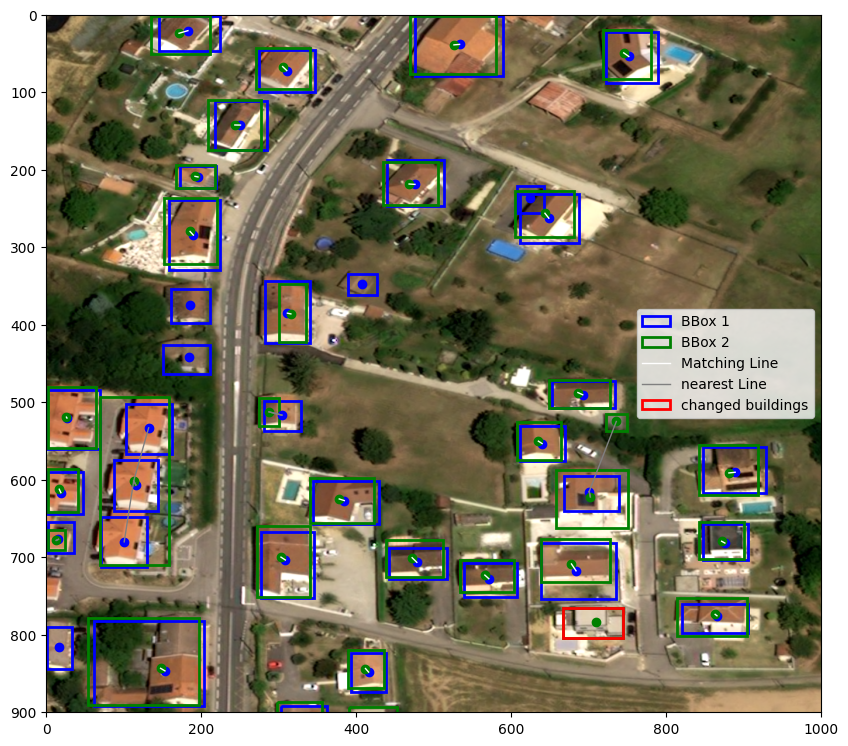

{34, 62, 65, 71, 75, 82}

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img1)
# bbox of instances in image0
for i, inst in enumerate(instances_0):
    centroid = inst['centroid']
    bbox = inst['bbox']
    cy, cx = centroid
    ax.plot(cx, cy, 'bo')
    rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         edgecolor='blue', facecolor='none', linewidth=2, label='BBox 1' if i == 0 else "")
    ax.add_patch(rect)

# bbox of instances in image1
for i, inst in enumerate(instances_1):
    centroid = inst['centroid']
    bbox = inst['bbox']
    cy, cx = centroid
    ax.plot(cx, cy, 'go')
    rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         edgecolor='green', facecolor='none', linewidth=2, label='BBox 2' if i == 0 else "")
    ax.add_patch(rect)

# matched pairs in image0 and image1
for pair in matched_pairs:
    centroid_t0= pair[0]['centroid']
    centroid_t1 = pair[1]['centroid']
    ax.plot([centroid_t0[1], centroid_t1[1]], [centroid_t0[0], centroid_t1[0]], 'w', linewidth=1, label='Matching Line' if pair == matched_pairs[0] else "")

# nearest pairs for the other unmatched instances
for pair in nearest_pairs0:
    centroid_t0 = pair[0]['centroid']
    centroid_t1 = pair[1]['centroid']
    ax.plot([centroid_t0[1], centroid_t1[1]], [centroid_t0[0], centroid_t1[0]], 'gray', linewidth=1, label='nearest Line' if pair == nearest_pairs0[0] else "")
for pair in nearest_pairs1:
    centroid_t0 = pair[0]['centroid']
    centroid_t1 = pair[1]['centroid']
    ax.plot([centroid_t0[1], centroid_t1[1]], [centroid_t0[0], centroid_t1[0]], 'gray', linewidth=1, label='nearest Line' if pair == nearest_pairs1[0] and nearest_pairs0==[] else "")

# changed instances in image1
for label in change_in_1:
    bbox = instances_1[label]['bbox']
    rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         edgecolor='red', facecolor='none', linewidth=2, label='changed buildings' if label == list(change_in_1)[0] else "")
    ax.add_patch(rect)

ax.legend()
ax.set_xlim(0, 1000)
ax.set_ylim(900, 0)

ax.set_aspect('equal', adjustable='box')
plt.show()
change_in_1